In [0]:
#Joshua Alvarado
#06/06/2020
#Josh.alvarado0328@gmail.com

#Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import time
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Twitter Api Credentials

Consumer_Key = "aFtN4QfJdqjk0GmxxRSiNtGhN"

Consumer_Secret_Key = "4xwCeig9D0tuDSyTo3goeYwqryQhHIelZPbBmcn3N6aKyb38Nn"

Access_Token = "1218311228344242176-D346wVdG6DWFI3vrg3F12pypWNj9ST"

Access_Token_Secret = "y3IB5zWGIJ5Yyy6XRSJVRTZmIDkj5A578n2TSEadfPDss"

#uthenticating Keys

auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)

auth.set_access_token(Access_Token,Access_Token_Secret)

api = tweepy.API(auth, wait_on_rate_limit= True,parser=tweepy.parsers.JSONParser())

#Target term which is the the bot @name
target_term="@FindSentiment"



In [0]:
def create_visuals(handle):
    #Extract 100 tweets from user
    posts = api.user_timeline(screen_name=handle, count=100, lang= "en",tweet_mode="extended")
    #Print last 5 recent tweets
    print("Show the 5 recent tweets: \n")
    i=1
    for tweet in posts[0:5]:
      print(str(i)+') ' + tweet["full_text"] + "\n")
      i = i + 1

    #Create a dataframe with a columb called tweets
    df = pd.DataFrame( [tweet["full_text"] for tweet in posts], columns=['tweets'])

    #show the first 5 rows of data
    df.head()

    #Clean the text

    #Create a function to clean the tweets
    def cleanTxt(text):
      text = re.sub(r'@[\w:]+', '', text) #removes @mentions
      text = re.sub(r'#','',text) #removing # symbol
      text = re.sub(r'RT[\s]+','',text) #removes retweets
      text = re.sub(r'https?:\/\/\S+','', text) #remove hyperlinks
      return text

    df['tweets'] = df['tweets'].apply(cleanTxt)

    #Show the cleaned text
    df

    # Create a function to get the subjectivity
    def getSubjectivity(text):
      return TextBlob(text).sentiment.subjectivity

    # Create a function to get the polarity
    def getPolarity(text):
      return TextBlob(text).sentiment.polarity

    # Create two new columns
    df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
    df['Polarity'] = df['tweets'].apply(getPolarity)

    # Show the new dataframe with the new columns

    # Plot the Word Cloud

    allWords = ' '.join([twts for twts in df ['tweets']])
    wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size=119,).generate(allWords)

    plt.imshow(wordCloud, interpolation = "bilinear")
    plt.axis('off')
    plt.title('Most common words for @' + handle)
    plt.savefig('wordcloud.png',bbox_inches='tight',dpi=600)
    plt.show()

    #Create a function to compute the negative, neutral and positive analysis
    def getAnalysis(score):
      if score < 0:
        return 'Negative'
      elif score == 0:
        return 'Neutral'
      else:
        return 'Positive'

    df['Analysis'] = df['Polarity'].apply(getAnalysis)

    df

    # Print all of the positive tweets
    j=1
    sortedDF = df.sort_values(by=['Polarity'])
    for i in range (0, sortedDF.shape[0]):
      if(sortedDF['Analysis'][i] == 'Neutral'):
        print(str(j) + ')' + sortedDF['tweets'][i])
        print()
        j = j+1

    # Print negative tweets
    j=1
    sortedDF = df.sort_values(by=['Polarity'], ascending='False')
    for i in range (0, sortedDF.shape[0]):
      if( sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ')' + sortedDF['tweets'][i])
        print()
        j = j+1

    # Plot the polarity and subjectivity 
    plt.figure(figsize=(8,6))
    for i in range(0, df.shape[0]):
      plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='blue')
      
    plt.title('Sentiment Analysis for @' + handle)
    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')
    plt.savefig('plot.png',bbox_inches='tight',dpi=600)
    plt.show()

    # Get the percentage of positive tweets 

    ptweets = df[df.Analysis == 'Positive']
    ptweets = ptweets['tweets']

    round( (ptweets.shape[0] / df.shape[0]) *100, 1)

    # Get the percentage of negative tweets 

    ntweets = df[df.Analysis == 'Negative']
    ntweets = ntweets['tweets']

    round( (ntweets.shape[0] / df.shape[0]) *100, 1)

    # Get the percentage of negative tweets 

    Neutraltweets = df[df.Analysis == 'Neutral']
    Neutraltweets = Neutraltweets['tweets']

    round( (Neutraltweets.shape[0] / df.shape[0]) *100, 1)

    # show the value counts

    df['Analysis'].value_counts()

    # plot and visualize the counts

    plt.title('Sentiment Analysis for @' + handle)
    plt.xlabel('Sentment')
    plt.ylabel('Counts')
    df['Analysis'].value_counts().plot(kind='bar')
    plt.savefig('graph.png',bbox_inches='tight',dpi=600)
    plt.show()

    # images = ('graph.png', 'wordcloud.png','plot.png')
    # test = [api.media_upload(i) for i in images]
    # print(test)
    # media_ids = [api.media_upload(i)['media_id_string'] for i in images]
    # print("I should have images ")
    # api.update_status(
    #                 "@%s thank you for using FindSentiment! Heres your data!" %
    #                 handle, media_ids=media_ids,
    #                 in_reply_to_status_id=tweet_id)


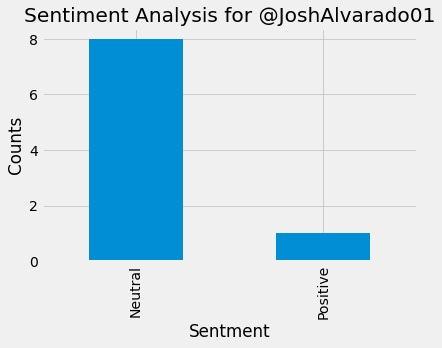

KeyboardInterrupt: ignored

In [32]:
def start(): 
  public_tweets = api.search(target_term, count=5, result_type="recent")
  for tweet in public_tweets["statuses"]:
    print("We are in here")
  # Get ID and Author of most recent tweet directed to me
    tweet_id = tweet["id"]
    handle = tweet["user"]["screen_name"] 
    print(handle)
    try:
      create_visuals(handle)
      images = ('graph.png', 'wordcloud.png','plot.png')
      test = [api.media_upload(i) for i in images]
      print(test)
      media_ids = [api.media_upload(i)['media_id_string'] for i in images]
      print("I should have images ")
      api.update_status(
                      "@%s thank you for using FindSentiment! Heres your data!" %
                      handle, media_ids=media_ids,
                      in_reply_to_status_id=tweet_id)
      print("WE DID IT SUCCESS!")
    except Exception:
      print("We've already replied to this.")
      raise
    print("We're done for now. I'll check again in 60 seconds.")

while(True):
  start()
  time.sleep(60)
    
